# FFT Practice - CWRU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import z_dependancy as z_dep
plt.rc('font', size=20)

# 데이터 로드

## 회전 주파수 알아보기

In [2]:
F_shaft_rpm = 1797
F_shaft = F_shaft_rpm/60
print('Shaft Frequency is', F_shaft)

Shaft Frequency is 29.95


## 베어링 주파수 DB 만들기

In [3]:
F_BPFI = 5.4152
F_BPFO = 3.5848
F_FTF = 0.398
F_BSF = 4.7135

F_BPFI_w = F_BPFI*F_shaft
F_BPFO_w = F_BPFO*F_shaft
F_FTF_w = F_FTF*F_shaft
F_BSF_w = F_BSF*F_shaft

print('Outer Race Fault Frequency is', F_BPFO_w)

Outer Race Fault Frequency is 107.36476


## 신호 로드하고 그려보기

### 신호 로드하기

In [4]:
fs=12000
data = np.array(pd.read_csv('./data/data_fault.csv'))
print(np.shape(data))
print(data)
v = data[:,1]

(121846, 2)
[[ 0.00000000e+00  2.27353293e-03]
 [ 1.00000000e+00 -1.04947904e-01]
 [ 2.00000000e+00  8.20095808e-02]
 ...
 [ 1.21843000e+05 -1.12377485e-01]
 [ 1.21844000e+05 -8.52980838e-02]
 [ 1.21845000e+05 -2.62674251e-02]]


### 신호 그리기

(-4.0, 4.0)

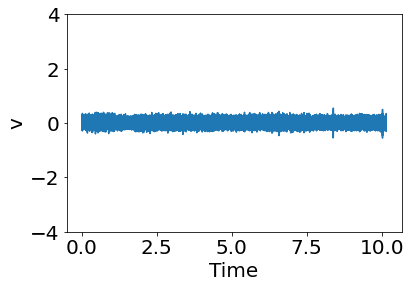

In [5]:
T = len(v)/fs               # 전체 샘플수 / 1초당 샘플수 = 총 시간
t=np.arange(1/fs, T, 1/fs)  # 1/fs초 부터 T초까지 1/fs초 간격

plt.figure()
plt.plot(t,v)
plt.xlabel('Time')
plt.ylabel('v')
plt.ylim([-4,4])

## 주파수 분석해보기

In [6]:
f, A = z_dep.z_fft_simple(v,fs)

(0.0, 0.06)

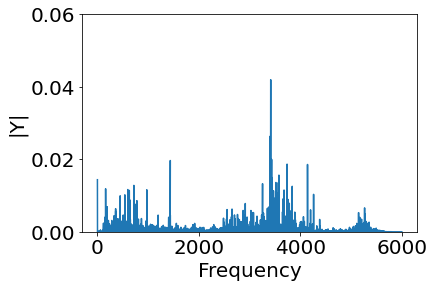

In [7]:
plt.figure()
plt.plot(f,A)
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.ylim([0,0.06])

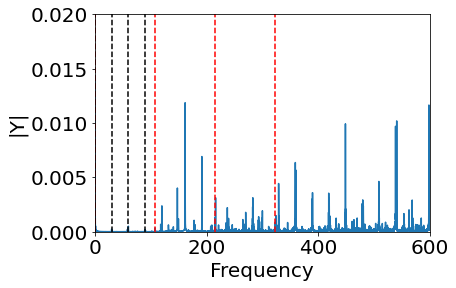

In [8]:
plt.figure()
plt.plot(f,A)
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.xlim([0, 600])
plt.ylim([0,0.02])

for n in range(4):
    plt.axvline(n*F_shaft, color='k', linestyle='dashed')
    plt.axvline(n*F_BPFO_w, color='r', linestyle='dashed')